In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
os.listdir()

['.git',
 '.idea',
 'data',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'models',
 'README.md',
 'trainers']

In [4]:
from data_loader.wave_csv_loader import load_wave_csv
from data_processor.data_handler import split_data, normalize_data, numpy_to_tensor
from models.Linear import LogisticRegression
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays

In [5]:
X, y = load_wave_csv('data/features_3_sec.csv')
print(X)
print(y)

[[ 3.35406363e-01  9.10482928e-02  1.30405024e-01 ...  3.36180725e+01
  -2.43026793e-01  4.37717667e+01]
 [ 3.43065351e-01  8.61465260e-02  1.12699248e-01 ...  9.70308304e+01
   5.78406334e+00  5.99430809e+01]
 [ 3.46814752e-01  9.22428891e-02  1.32003382e-01 ...  5.30508347e+01
   2.51737475e+00  3.31051216e+01]
 ...
 [ 3.89454782e-01  9.09519717e-02  1.29882321e-01 ...  3.11252632e+01
  -1.97238910e+00  3.39405251e+01]
 [ 4.05319244e-01  8.35637301e-02  1.22895069e-01 ...  2.69899826e+01
  -3.20398521e+00  4.59401054e+01]
 [ 4.04818267e-01  7.60343075e-02  1.21500097e-01 ...  6.49437332e+01
   1.59542286e+00  4.97229156e+01]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, [8, 1, 1])
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3194, 57)
(400, 57)
(400, 57)


In [7]:
X_train, X_val, X_test = normalize_data([X_train, X_val, X_test])

In [8]:
print(X_train[0])
print(X_val[0])
print(X_test[0])

[-1.56411754 -0.83876005 -0.67245699 -0.47269558 -1.13674874 -0.95903918
 -1.24179777 -0.64176311 -1.42916793 -1.01777309 -0.61244229 -0.71276853
 -0.35012246 -0.51138098 -0.27251877 -0.81367642  1.15902582 -0.58193373
 -0.56386725  1.66845654 -0.78344725 -0.04642623 -0.29561837 -2.57710422
 -0.9344171  -0.91669343 -0.84026303 -2.0586208  -0.8075416  -0.1764221
 -1.06769781 -0.97949769 -0.47469939  2.13522469 -1.03259532  0.99128928
 -0.84149573  0.78805165 -0.24587866 -0.69582322  0.15677505  0.66492742
 -0.48414138 -1.17530986  0.70052944 -0.89202995 -0.33068997 -0.82724999
 -0.44402967  0.20939502 -0.40682495 -0.3851603   0.15051456 -0.71810148
  0.31044479 -1.07426939  1.33461347]
[ 1.99581803e-01 -5.77275008e-01  1.23499122e+00 -5.29805005e-01
 -2.45415841e-01 -7.77995190e-01 -8.80504018e-01 -7.83830631e-01
 -8.04960210e-01 -1.03878789e+00  1.20033886e+00 -3.51551397e-02
 -1.81764976e+00  1.03917273e+00 -2.97549359e+00  2.38876737e-01
 -3.55775895e-01  8.29219981e-01 -8.89528083e-

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = numpy_to_tensor([X_train, y_train, X_val, y_val, X_test, y_test])

In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([400, 57])
torch.Size([400, 4])


In [11]:
model = LogisticRegression(57, 4)

In [12]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, [X_train, y_train, X_val, y_val])

Epoch  0: loss on final training batch: 1.1750
training accuracy: 62.84% validation accuracy: 65.00%
Epoch  1: loss on final training batch: 1.1154
training accuracy: 68.53% validation accuracy: 71.75%
Epoch  2: loss on final training batch: 1.0889
training accuracy: 72.45% validation accuracy: 74.75%
Epoch  3: loss on final training batch: 1.0702
training accuracy: 74.89% validation accuracy: 78.25%
Epoch  4: loss on final training batch: 1.0551
training accuracy: 77.08% validation accuracy: 78.50%
Epoch  5: loss on final training batch: 1.0420
training accuracy: 78.40% validation accuracy: 79.25%
Epoch  6: loss on final training batch: 1.0307
training accuracy: 79.65% validation accuracy: 80.50%
Epoch  7: loss on final training batch: 1.0207
training accuracy: 80.65% validation accuracy: 81.50%
Epoch  8: loss on final training batch: 1.0120
training accuracy: 81.97% validation accuracy: 81.50%
Epoch  9: loss on final training batch: 1.0045
training accuracy: 82.97% validation accurac

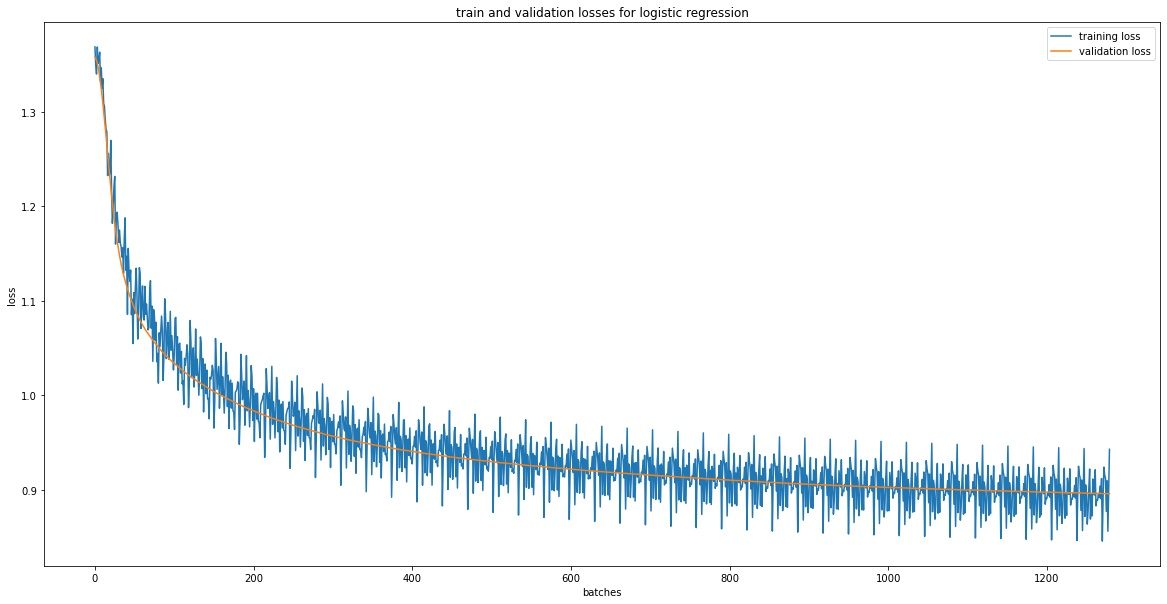

In [13]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for logistic regression')

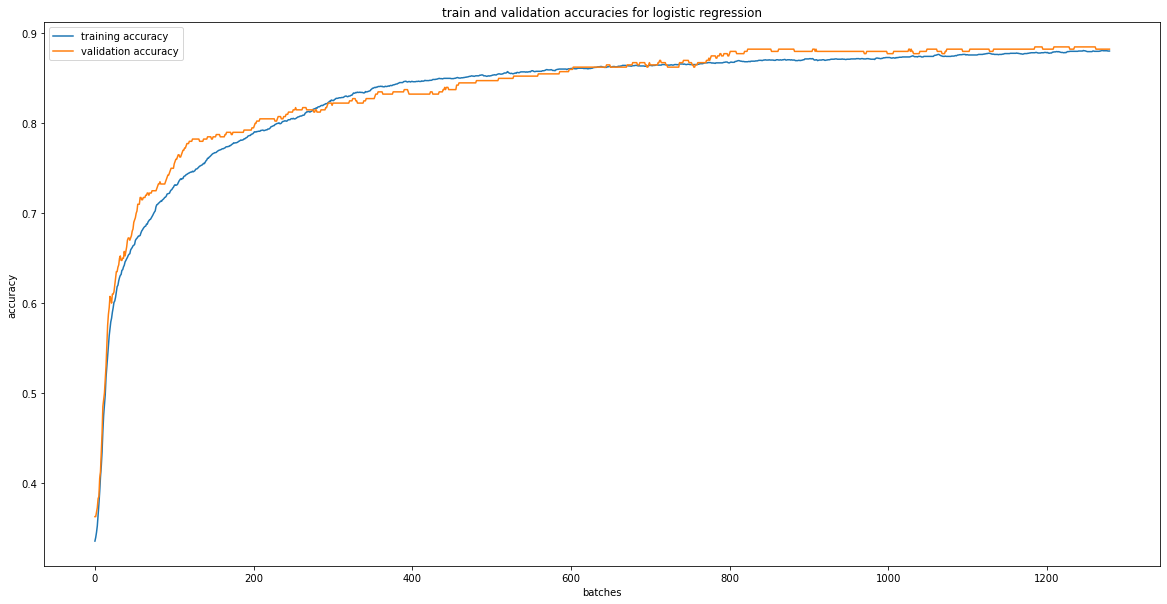

In [14]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for logistic regression')